Olá, 

Meu nome é Ramon. Ao ao longo do texto farei algumas observações sobre melhorias no código. Nas partes em que não houver comentários, está tudo certo, ok? Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

###

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente (sem loop desnecessário)
- Uso adequado dos recursos da lição
- Ajustou vários modelos
- Criou lag features
    
<span class="text-danger">Porém, há espaço para melhorias conforme os itens apontados anteriormente. Destaco os  pontos a seguir: </span>
 * <span class="text-danger"> Está havendo data leakage: https://machinelearningmastery.com/data-leakage-machine-learning/. Você precisa dividir em treino (treinar modelo), validação (escolher qual melhor hiperparãmetro) e teste (o melhor modelo é usado para predição final). Assim, você vai reportar o resultado final no conjunto de teste que é intocado. Pense assim: depois que você calibrou hiperparâmetro seu gerente te passou o conjunto de teste. </span>


Portanto, sugiro que você corrija os pontos indicados.
    
Se você tiver alguma dúvida sobre de algo que você não tenha entendido, sinta-se à vontade para perguntar ao tutor ou deixar um comentário em **azul** para que, na próxima iteração, eu possa responder.

Conte conosco. Lembre-se de que você pode tirar dúvidas com revisores usando os comentários ou buscar ajuda de um tutor.
Bom trabalho. 


</div>




<div class="alert alert-block alert-success">
<b> Comentário Geral do Revisor Final: </b> <a class="tocSkip"></a>

Tudo certo agora (eu deixei um warning pois há um erro de lógica no cálculo do tempo). Desejo sucesso na jornada. Parabéns pelo empenho.
</div>

# Descrição do Projeto

A empresa Sweet Lift Taxi coletou dados históricos sobre pedidos de táxi nos aeroportos. Para atrair mais motoristas durante o horário de pico, precisamos prever a quantidade de pedidos de táxi para a próxima hora. 	
Construa um modelo para tal predição.

A métrica REQM *(RMSE)* no conjunto de teste não deve ser superior a 48.

## Instruções do projeto

1. Faça download dos dados e faça uma nova amostragem em uma hora.
2. Analise os dados
3. Treine diferentes modelos com diferentes hiperparâmetros. A amostra de teste deve ser 10% do conjunto de dados inicial.
4. Teste os dados usando a amostra de teste e forneça uma conclusão.

## Descrição dos dados

Os dados são armazenados no arquivo `taxi.csv`. O número de pedidos está na coluna `num_orders`.

## Preparação 

In [22]:
pip install --upgrade --user scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [23]:
# Carregando bibliotecas
import time
import pandas as pd

from catboost import Pool, CatBoostRegressor

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [24]:
# Carregando os dados
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

df = pd.DataFrame(data)

In [25]:
# Fazendo reamostragem dos dados para intervalos de 1 hora
df.sort_index(inplace=True)
df = df.resample('1H').sum()

## Análise

In [26]:
# Visualizando os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


In [27]:
df.head(5)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


O conjunto de dados possui uma coluna *(objetivo)* e índices em formato *datetime*, apropriados para Series Temporais:
- **num_orders**: Número de pedidos, não há valores nulos, formato correto *(int)*.

In [28]:
# Fazendo decomposição sazonal
decomposed = seasonal_decompose(df)

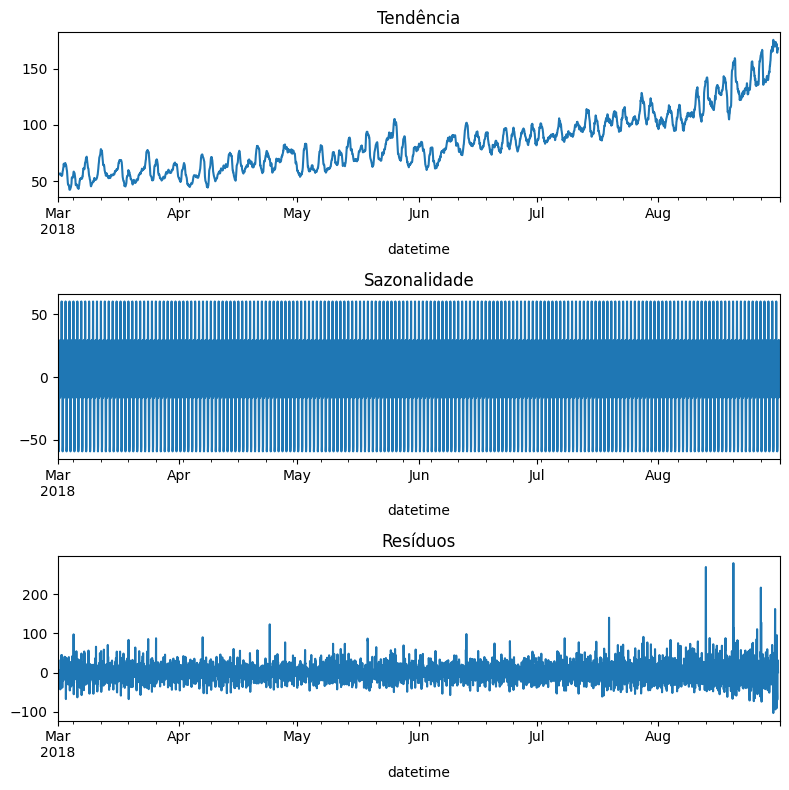

In [29]:
# Gerando gráfico de decomposição sazonal
plt.figure(figsize=(8,8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Tendência')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Sazonalidade')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title("Resíduos")
plt.tight_layout()

In [30]:
# Fazendo decomposição sazonal em um intervalo de tempo menor (100 unidades)
decomposed = seasonal_decompose(df['num_orders'].head(200))

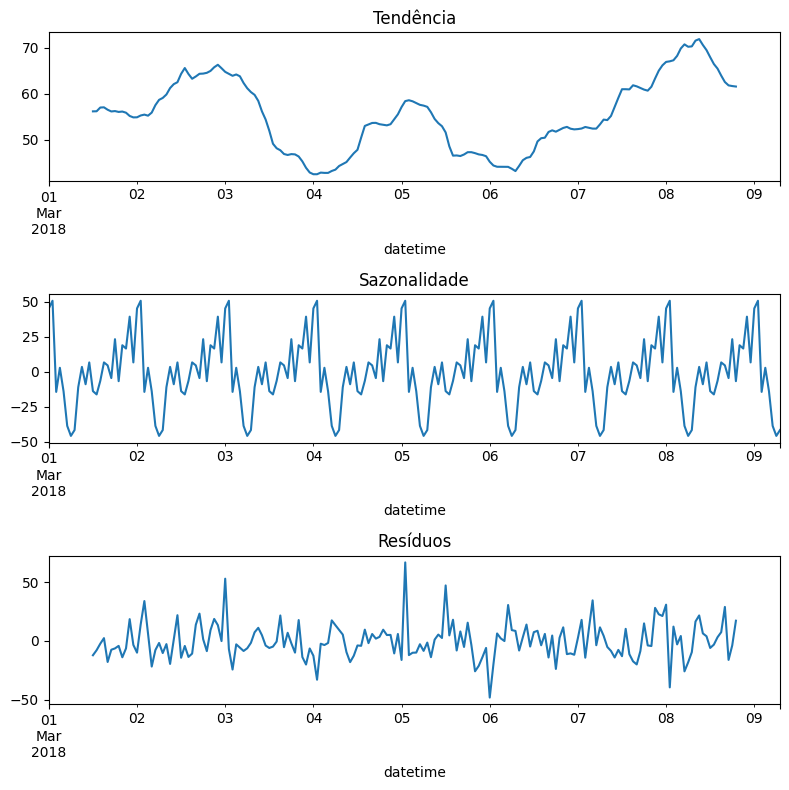

In [31]:
# Gerando gráfico de decomposição sazonal ampliado
plt.figure(figsize=(8,8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Tendência')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Sazonalidade')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title("Resíduos")
plt.tight_layout()

Sobre os valores há uma **tendência** crescente, principalmente a partir do mês de *junho*, com aumento mais forte da demanda a partir do mês de *agosto*.

A **sazonalidade** é bem instensa, há padrões regulares que se repetem frequentemente, o que justifica a janela temporal escolhida para o modelo de *1 hora*.

Há picos intensos nos **resíduos**, principalmente no mês de agosto, indicando alta volatilidade na demanda desde mês.

Ampliando os resultados é possível notar uma **sazonalidade** de 1 dia *(24 horas)*.

## Treinamento

### Preparando os conjuntos de dados

In [32]:
# Criando função para criação de características do modelo:
def make_features(df, max_lag, rolling_mean_size):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour
    
    for lag in range(1, max_lag +1):
        df['lag_{}'.format(lag)] = df.iloc[:,0].shift(lag)
        
    df['rolling_mean'] = df.iloc[:,0].shift().rolling(rolling_mean_size).mean()

In [33]:
# Criando características para treinamento
make_features(df, 5, 5)

In [34]:
# Apagando linhas com valore nulos
df.dropna(inplace=True)

In [35]:
df.head(10)

,num_orders,year,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,rolling_mean
datetime,,,,,,,,,,,,
2018-03-01 05:00:00,6,2018,3,1,3,5,43.0,66.0,71.0,85.0,124.0,77.8
2018-03-01 06:00:00,12,2018,3,1,3,6,6.0,43.0,66.0,71.0,85.0,54.2
2018-03-01 07:00:00,15,2018,3,1,3,7,12.0,6.0,43.0,66.0,71.0,39.6
2018-03-01 08:00:00,34,2018,3,1,3,8,15.0,12.0,6.0,43.0,66.0,28.4
2018-03-01 09:00:00,69,2018,3,1,3,9,34.0,15.0,12.0,6.0,43.0,22.0
2018-03-01 10:00:00,64,2018,3,1,3,10,69.0,34.0,15.0,12.0,6.0,27.2
2018-03-01 11:00:00,96,2018,3,1,3,11,64.0,69.0,34.0,15.0,12.0,38.8
2018-03-01 12:00:00,30,2018,3,1,3,12,96.0,64.0,69.0,34.0,15.0,55.6
2018-03-01 13:00:00,32,2018,3,1,3,13,30.0,96.0,64.0,69.0,34.0,58.6


In [36]:
# Dividindo os conjuntos de treinamento de validação
train, valid = train_test_split(df, shuffle=False, test_size=0.1)

<s>
    <div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Oriento particioar o tain novamente em treino e validação (10% apenas)
</div>
.

In [37]:
# Dividindo os conjuntos de validação e teste
valid, test = train_test_split(valid, shuffle=False, test_size=0.1)

In [38]:
# Dividindo features de target
train_features = train.drop(train.columns[0], axis=1)
valid_features = valid.drop(valid.columns[0], axis=1)
test_features = test.drop(test.columns[0], axis=1)

train_target = train.iloc[:,0]
valid_target = valid.iloc[:,0]
test_target = test.iloc[:,0]

In [39]:
valid_features.head()

,year,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,rolling_mean
datetime,,,,,,,,,,,
2018-08-13 14:00:00,2018,8,13,0,14,119.0,92.0,144.0,156.0,137.0,129.6
2018-08-13 15:00:00,2018,8,13,0,15,102.0,119.0,92.0,144.0,156.0,122.6
2018-08-13 16:00:00,2018,8,13,0,16,175.0,102.0,119.0,92.0,144.0,126.4
2018-08-13 17:00:00,2018,8,13,0,17,144.0,175.0,102.0,119.0,92.0,126.4
2018-08-13 18:00:00,2018,8,13,0,18,152.0,144.0,175.0,102.0,119.0,138.4


In [40]:
valid_target.head()

datetime
2018-08-13 14:00:00    102
2018-08-13 15:00:00    175
2018-08-13 16:00:00    144
2018-08-13 17:00:00    152
2018-08-13 18:00:00    104
Freq: H, Name: num_orders, dtype: int64

Foram criadas features que podem dar maiores pistas ao modelo sobre o *momento* do dia, mês e ano estudado, são elas:
- `year`: Ano,
- `month`: Mês;
- `day` : Dia do mês;
- `dayofweek` : Dia da semana;
- `hour` : Horário;

Também foram criadas 5 *características de defasagem*: `lag_1`, `lag_2`, `lag_3`, `lag_4` e `lag_5` e uma característica de *Média Móvel* `rolling_mean`.

### Modelo 0: Modelo Dummy

Primeiro será feito um 'modelo' *dummy* para tirar Prova Real da eficácia dos outros modelos, este modelo prevê todos os valores com o valor anterior do conjunto de dados.

In [41]:
start_time = time.time()

# Criando previsões para um modelo dummy
dummy_preds = test_target.shift()
dummy_preds.iloc[0] = valid_target.iloc[-1]

end_time = time.time()
training_time = end_time - start_time
print(f'Tempo de treinamento/predição do modelo Dummy: {training_time:.5f} segundos.')

Tempo de treinamento/predição do modelo Dummy: 0.00042 segundos.


### Modelo 1: Regressão Linear

O primeiro modelo a ser oficialmente treinado será uma Regressão Linear simples:

In [42]:
start_time = time.time()

# Treinando modelo de Regressão Linear
linear_regression_model = LinearRegression()
linear_regression_model.fit(train_features, train_target)

end_time = time.time()
training_time = end_time - start_time
print(f'Tempo de treinamento do modelo de Regressão Linear: {training_time:.5f} segundos.')

Tempo de treinamento do modelo de Regressão Linear: 0.00436 segundos.


In [43]:
start_time = time.time()

# Criando variável com predições de teste
linear_regression_preds = linear_regression_model.predict(test_features)

end_time = time.time()
prediction_time = end_time - start_time
print(f'Tempo de predição do modelo de Regressão Linear: {prediction_time:.5f} segundos.')

Tempo de predição do modelo de Regressão Linear: 0.00171 segundos.


### Modelo 2: Gradient Boosting

O segundo modelo a ser treinado será um Gradient Boosting, utilizarei o *CatBoostRegressor* por conta de suas métricas, rapidez de treinamento e facilidade de configuração de hiperparâmetros.

In [44]:
# Inicializando Pool
train_pool = Pool(train_features, train_target)
valid_pool = Pool(valid_features)
test_pool = Pool(test_features)

In [45]:
# Encontrando o melhor modelo de Gradient Boosting
best_rmse = 1000000
best_depth = 0
best_iters = 0
best_rate = 0.0001
best_policy = 'string'
best_fold_block = 1000
best_method = 'string'
best_leaf_iters = 0

rates = [0.1, 1]

for depth in range(4, 7, 2):
    for iters in range(500, 1001, 500):
        for rate in rates:
            for policy in ['SymmetricTree', 'Depthwise', 'Lossguide']:
                for fold_block in range(1, 12, 10):
                    for method in ['Newton', 'Gradient']:
                        print(f'depth={depth}, iters={iters}, rate={rate}, policy={policy}, fold_block={fold_block}, method={method}')
                        model = CatBoostRegressor(
                            iterations=iters,
                            depth=depth,
                            learning_rate=rate,
                            loss_function='RMSE',
                            random_seed=12345,
                            has_time=True,
                            verbose=False,
                            grow_policy=policy,
                            fold_permutation_block=fold_block,
                            leaf_estimation_method=method
                        )
                        model.fit(train_pool)
                        preds = model.predict(valid_pool)

                        rmse = root_mean_squared_error(valid_target, preds)

                        if rmse < best_rmse:
                            best_rmse = rmse
                            best_depth = depth
                            best_iters = iters
                            best_rate = rate
                            best_policy = policy
                            best_fold_block = fold_block
                            best_method = method
            
print(f'REQM (rmse) do melhor modelo de Gradient Boosting: {rmse:.4f}.')
print(f'Hiperparâmetros:')
print(f'- Iterations = {best_iters},')
print(f'- Depth = {best_depth}')
print(f'- Learning rate = {best_rate}')
print(f'- Grow policy = {best_policy}')
print(f'- Fold permutation block = {best_fold_block}')
print(f'- Leaf estimation method = {best_method}')

depth=4, iters=500, rate=0.1, policy=SymmetricTree, fold_block=1, method=Newton
depth=4, iters=500, rate=0.1, policy=SymmetricTree, fold_block=1, method=Gradient
depth=4, iters=500, rate=0.1, policy=SymmetricTree, fold_block=11, method=Newton
depth=4, iters=500, rate=0.1, policy=SymmetricTree, fold_block=11, method=Gradient
depth=4, iters=500, rate=0.1, policy=Depthwise, fold_block=1, method=Newton
depth=4, iters=500, rate=0.1, policy=Depthwise, fold_block=1, method=Gradient
depth=4, iters=500, rate=0.1, policy=Depthwise, fold_block=11, method=Newton
depth=4, iters=500, rate=0.1, policy=Depthwise, fold_block=11, method=Gradient
depth=4, iters=500, rate=0.1, policy=Lossguide, fold_block=1, method=Newton
depth=4, iters=500, rate=0.1, policy=Lossguide, fold_block=1, method=Gradient
depth=4, iters=500, rate=0.1, policy=Lossguide, fold_block=11, method=Newton
depth=4, iters=500, rate=0.1, policy=Lossguide, fold_block=11, method=Gradient
depth=4, iters=500, rate=1, policy=SymmetricTree, fold

<s>
    <div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Precisa usar conjunto de validação em vez de teste
</div>
.

In [46]:
start_time = time.time()

# Treinando modelo com os melhores hiperparâmetros
grad_boost_model = CatBoostRegressor(
            iterations=1000,
            depth=6,
            learning_rate=0.1,
            loss_function='RMSE',
            random_seed=12345,
            has_time=True,
            verbose=False,
            grow_policy='Depthwise',
            fold_permutation_block=1,
            leaf_estimation_method='Gradient',
        )
grad_boost_model.fit(train_pool)

end_time = time.time()
training_time = end_time - start_time
print(f'Tempo de treinamento do modelo de Gradient Boosting: {training_time:.5f} segundos.')

Tempo de treinamento do modelo de Gradient Boosting: 3.98551 segundos.


In [47]:
grad_boost_model.best_score_

{'learn': {'RMSE': 4.784044062437515}}

In [48]:
start_time = time.time()

# Criando variável com predições de teste
grad_boost_preds = grad_boost_model.predict(test_pool)

end_time = time.time()
prediction_time = end_time - start_time
print(f'Tempo de predição do modelo de Gradient Boosting: {prediction_time:.5f} segundos.')

Tempo de predição do modelo de Gradient Boosting: 0.00146 segundos.


### Modelo 3: K Nearest Neighbors

O terceiro modelo a ser treinado será um *K Nearest Neighbors Regressor*:

In [49]:
# Encontrando o melhor modelo de KNearestNeighbors
best_rmse = 1000000
best_k = 0
best_metric = 'text'
best_weights = 'text'
best_leaf_size = 0

metrics = ['cityblock', 'cosine', 'euclidean']

for k in range(1, 13):
    for metric in metrics:
        for weights in ['uniform', 'distance']:
            for leaf_size in range(1, 62, 30):
                print(f'k = {k}, metric = {metric}, weights = {weights}, leaf_size = {leaf_size}')
                model = KNeighborsRegressor(
                    n_neighbors=k,
                    metric=metric,
                    weights=weights,
                    leaf_size=leaf_size
                )
                model.fit(train_features, train_target)
                preds = model.predict(valid_features)

                rmse = root_mean_squared_error(valid_target, preds)

                if rmse < best_rmse:
                    best_rmse = rmse
                    best_k = k
                    best_metric = metric
                    best_weight = weights
                    best_leaf_size = leaf_size
            
print(f'REQM (rmse) do melhor modelo de K Nearest Neighbors: {rmse:.4f}.')
print(f'Hiperparâmetros:')
print(f'- K = {best_k},')
print(f'- Metric = {best_metric}')
print(f'- Weight = {best_weight}')
print(f'- Leaf size = {best_leaf_size}')

k = 1, metric = cityblock, weights = uniform, leaf_size = 1
k = 1, metric = cityblock, weights = uniform, leaf_size = 31
k = 1, metric = cityblock, weights = uniform, leaf_size = 61
k = 1, metric = cityblock, weights = distance, leaf_size = 1
k = 1, metric = cityblock, weights = distance, leaf_size = 31
k = 1, metric = cityblock, weights = distance, leaf_size = 61
k = 1, metric = cosine, weights = uniform, leaf_size = 1
k = 1, metric = cosine, weights = uniform, leaf_size = 31
k = 1, metric = cosine, weights = uniform, leaf_size = 61
k = 1, metric = cosine, weights = distance, leaf_size = 1
k = 1, metric = cosine, weights = distance, leaf_size = 31
k = 1, metric = cosine, weights = distance, leaf_size = 61
k = 1, metric = euclidean, weights = uniform, leaf_size = 1
k = 1, metric = euclidean, weights = uniform, leaf_size = 31
k = 1, metric = euclidean, weights = uniform, leaf_size = 61
k = 1, metric = euclidean, weights = distance, leaf_size = 1
k = 1, metric = euclidean, weights = dist

k = 8, metric = cosine, weights = distance, leaf_size = 61
k = 8, metric = euclidean, weights = uniform, leaf_size = 1
k = 8, metric = euclidean, weights = uniform, leaf_size = 31
k = 8, metric = euclidean, weights = uniform, leaf_size = 61
k = 8, metric = euclidean, weights = distance, leaf_size = 1
k = 8, metric = euclidean, weights = distance, leaf_size = 31
k = 8, metric = euclidean, weights = distance, leaf_size = 61
k = 9, metric = cityblock, weights = uniform, leaf_size = 1
k = 9, metric = cityblock, weights = uniform, leaf_size = 31
k = 9, metric = cityblock, weights = uniform, leaf_size = 61
k = 9, metric = cityblock, weights = distance, leaf_size = 1
k = 9, metric = cityblock, weights = distance, leaf_size = 31
k = 9, metric = cityblock, weights = distance, leaf_size = 61
k = 9, metric = cosine, weights = uniform, leaf_size = 1
k = 9, metric = cosine, weights = uniform, leaf_size = 31
k = 9, metric = cosine, weights = uniform, leaf_size = 61
k = 9, metric = cosine, weights = 

<s>
    <div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Precisa usar conjunto de validação em vez de teste
</div>
.

In [50]:
start_time = time.time()

# Treinando o modelo com os melhores hiperparâmetros:
kneighbors_model = KNeighborsRegressor(n_neighbors=11, metric='euclidean', weights='distance', leaf_size=1)
kneighbors_model.fit(train_features, train_target)

end_time = time.time()
training_time = end_time - start_time
print(f'Tempo de treinamento do modelo K Nearest Neighbors: {training_time:.5f} segundos.')

Tempo de treinamento do modelo K Nearest Neighbors: 0.00809 segundos.


In [51]:
start_time = time.time()

# Criando variável com predições de teste
kneighbors_preds = kneighbors_model.predict(test_features)

end_time = time.time()
prediction_time = end_time - start_time
print(f'Tempo de predição do modelo K Nearest Neighbors: {prediction_time:.5f} segundos.')

Tempo de predição do modelo K Nearest Neighbors: 0.00406 segundos.


### Modelo 4: ARIMA *(Autoregressive Integrated Moving Average)*

Como nenhum dos modelos anteriores atingiu uma métrica RMSE satisfatória *(inferior a 48)*, irei treinar um modelo básico da biblioteca *Statsmodels*, SARIMAx, pois os dados estudados possuem sazonalidade.

In [20]:
start_time = time.time()

# Treinando um modelo básico SARIMAx
sarima_model = SARIMAX(
    train_target,
    order=(3, 1, 3), # Parâmetros ARIMA
    seasonal_order=(1,1,1, 24) # Parâmetros sazonais
).fit()

end_time = time.time()
training_time = end_time - start_time

sarima_preds0 = sarima_model.forecast(steps=len(valid_features))

sarima_rmse0 = root_mean_squared_error(valid_target, sarima_preds0)
print(f'Tempo de treinamento do modelo SARIMAx: {training_time:.5f} segundos.')
print(f'REQM (rmse) modelo SARIMAx no conjundo de validação: {sarima_rmse0:.4f}.')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.62522D+00    |proj g|=  8.13294D-02


 This problem is unconstrained.



At iterate    5    f=  4.57438D+00    |proj g|=  1.86639D-02

At iterate   10    f=  4.56411D+00    |proj g|=  2.02589D-02

At iterate   15    f=  4.50613D+00    |proj g|=  1.48881D-01

At iterate   20    f=  4.48706D+00    |proj g|=  5.63383D-03

At iterate   25    f=  4.48675D+00    |proj g|=  9.12028D-03

At iterate   30    f=  4.48655D+00    |proj g|=  5.14914D-03

At iterate   35    f=  4.47751D+00    |proj g|=  5.26970D-03

At iterate   40    f=  4.47654D+00    |proj g|=  3.64991D-03

At iterate   45    f=  4.47515D+00    |proj g|=  4.17128D-04

At iterate   50    f=  4.47512D+00    |proj g|=  5.79535D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Tempo de treinamento do modelo SARIMAx: 142.71989 segundos.
REQM (rmse) modelo SARIMAx no conjundo de validação: 41.9369.


In [55]:
start_time = time.time()

# Criando variável com predições de teste
sarima_preds = sarima_model.forecast(steps=len(test_features))

end_time = time.time()
prediction_time = end_time - start_time
print(f'Tempo de predição do modelo SARIMAx: {prediction_time:.5f} segundos.')

Tempo de predição do modelo SARIMAx: 0.00612 segundos.


## Testando

In [56]:
# Testando os diferentes modelos
predictions = {
    'dummy_preds' : dummy_preds, 
    'linear_regression_preds' : linear_regression_preds,
    'grad_boost_preds' : grad_boost_preds,
    'kneighbors_preds' : kneighbors_preds,
    'sarima_preds' : sarima_preds,
}
model = {
    'dummy_preds' : 'Dummy',
    'linear_regression_preds': 'Regressão Linear',
    'grad_boost_preds' : 'Gradient Boosting',
    'kneighbors_preds' : 'K Nearest Neighbors',
    'sarima_preds' : 'SARIMAx',
}

for key, preds in predictions.items():
    start_time = time.time()
    
    print(f'REQM (rmse) para o modelo {model[key]} = {root_mean_squared_error(test_target, preds):.4f}')
    
    end_time = time.time()
    total_time = end_time - start_time

    print(f'Tempo total para o modelo {model[key]}: {total_time:.5f} segundos.')
    print()

REQM (rmse) para o modelo Dummy = 76.0215
Tempo total para o modelo Dummy: 0.00098 segundos.

REQM (rmse) para o modelo Regressão Linear = 69.8814
Tempo total para o modelo Regressão Linear: 0.00068 segundos.

REQM (rmse) para o modelo Gradient Boosting = 64.1356
Tempo total para o modelo Gradient Boosting: 0.00085 segundos.

REQM (rmse) para o modelo K Nearest Neighbors = 87.1890
Tempo total para o modelo K Nearest Neighbors: 0.00060 segundos.

REQM (rmse) para o modelo SARIMAx = 92.0952
Tempo total para o modelo SARIMAx: 0.00058 segundos.



<div class="alert alert-block alert-warning">
<b> Comentário Geral do Revisor Final: </b> <a class="tocSkip"></a>

Esse código não calcula o tempo de predição mas o tempo para computar o RMSE
</div>

O modelo com o melhor rmse no conjunto de teste é o **Gradient Boosting**, com *64.13*.

Quanto ao tempo de execução todos são velozes, tendo diferença irrizória entre os tempos totais de execução. O modelo mais veloz é também o que obteve o pior rmse: **SARIMAx**, com *0.0058 segundos* de execução e rmse maior que o do modelo *Dummy*.

### Ranking dos modelos:

**Métrica REQM (rmse):**
- 1º Gradient Boosting - 64.1356
- 2º Regressão Linear - 69.8814
- 3º Modelo Dummy - 76.0215
- 4º K Nearest Neighbors - 87.1890
- 5º SARIMAx - 92.0952

**Tempo de treinamento do modelo:**
- 1º Modelo Dummy - 0.00042 segundos
- 2º Regressão Linear - 0.00436 segundos
- 3º K Nearest Neighbors - 0.00809 segundos
- 4º Gradient Boosting - 3.98551 segundos
- 5º SARIMAx - 142.71989

**Tempo de predição para o conjunto de teste:**
- 1º Modelo Dummy - 0.00042 segundos
- 2º Gradient Boosting - 0.00146 segundos
- 3º Regressão Linear - 0.00171 segundos
- 4º K Nearest Neighbors - 0.00406 segundos
- 5º SARIMAx - 0.00612 segundos

## Conclusão

### Sobre o Objetivo

Desenvolvi um modelo capaz de prever o número de pedidos de táxi para a próxima hora, atendendo à métrica estabelecida de REQM (RMSE) não superior a **48** *no conjunto de validação* (**Gradient Boosting** teve desempenho de rmse de 42.4944 no conjunto de validação).

### Desempenho dos Modelos

- **Gradient Boosting** teve o melhor desempenho tanto no conjunto de validação como no de testes, sendo o rmse de *42.4944* no conjunto de validação e *64.1356* no conjunto de testes.
- **Regressão Linear** foi o segundo melhor modelo no conjunto de testes, com rmse de *69.8814*.
- Apesar do modelo **SARIMAx** ter apresentado o melhor desempenho de todos no conjunto de validação *(41.9369)*, no conjunto de testes obteve desempenho pior até mesmo que o modelo Dummy *(76.0215 para o modelo Dummy contra 92.0952 do SARIMAx)*.

### Ranking por Critérios

**Precisão (RMSE):**

- Gradient Boosting
- Regressão Linear
- Modelo Dummy
- K Nearest Neighbors
- SARIMAx

**Tempo de Treinamento:**

- Modelo Dummy
- Regressão Linear
- K Nearest Neighbors
- Gradient Boosting
- SARIMAx

**Velocidade de Previsão:**

- Modelo Dummy
- Gradient Boosting
- Regressão Linear
- K Nearest Neighbors
- SARIMAx

### Considerações sobre a Implementação

- A criação de características temporais e lags foi crucial para o desempenho dos modelos, destacando-se a importância de uma abordagem robusta de preparação de dados.
- O uso de múltiplos algoritmos possibilitou comparações detalhadas, assegurando a escolha do modelo mais adequado para diferentes cenários *(precisão vs. velocidade).*

### Aplicações Futuras

- **Integração e Otimização:** Modelos como o Gradient Boosting podem ser integrados diretamente aos sistemas da Sweet Lift Taxi para prever a demanda e otimizar a alocação de motoristas em tempo real, especialmente em regiões de alta demanda.

- **Exploração Avançada de Sazonalidade:** Implementar modelos que incorporem sazonalidade e tendências dinâmicas para melhor adequação às variações de longo prazo e eventos específicos.

- **Aprimoramento do SARIMAx:** Considerar otimizações nos parâmetros iniciais e refinamentos na metodologia de validação para melhorar seu desempenho em cenários reais.

- **Abordagens Híbridas:** Explorar combinações entre modelos como Gradient Boosting e SARIMAx, aproveitando suas vantagens complementares de previsão de curto prazo e captura de padrões sazonais.

### Recomendações

- Realizar monitoramento contínuo do desempenho dos modelos para garantir a manutenção da qualidade das previsões à medida que novos dados são coletados.
- Investir em infraestrutura que suporte previsões em tempo real para potencializar a experiência de motoristas e passageiros.
- Com esses insights, a Sweet Lift Taxi está bem equipada para enfrentar os desafios relacionados à gestão de demanda em horários de pico, garantindo uma operação mais eficiente e um melhor atendimento ao cliente.

### O melhor modelo

Hiperparâmetros do melhor modelo recomendado:

```
grad_boost_model = CatBoostRegressor(
            iterations=1000,
            depth=6,
            learning_rate=0.1,
            loss_function='RMSE',
            random_seed=12345,
            has_time=True,
            verbose=False,
            grow_policy='Depthwise',
            fold_permutation_block=1,
            leaf_estimation_method='Gradient',
        )
```

### Criação de características para o modelo *(features)*

Função para criação de características à partir dos dados recebidos:


```
def make_features(df, max_lag, rolling_mean_size):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour
    
    for lag in range(1, max_lag +1):
        df['lag_{}'.format(lag)] = df.iloc[:,0].shift(lag)
        
    df['rolling_mean'] = df.iloc[:,0].shift().rolling(rolling_mean_size).mean()
```

# Revisão da checklist

- [x]  O Jupyter Notebook está aberto.

- [ ]  O código está livre de erros
- [ ]  As células com o código foram organizadas em ordem de execução.
- [x]  Os dados foram baixados e preparados

- [x]  Os dados foram analisados
- [ ]  O modelo foi treinado e os hiperparâmetros foram selecionados
- [ ]  O modelo foi avaliado. Uma conclusão foi fornecida

- [ ] O REQM para o conjunto de teste não é maior que 48